# Experimento Computacional 1
Utilizando os métodos de geração de números aleatórios, desenvolva um software que
possibilite gerar as seguintes distribuições de probabilidades:

<ol>
    <li>Exponencial</li>
    <li>Normal (Gaussiana)</li>
    <li>Qui-Quadrado</li>
    <li>Poisson</li>
</ol>

In [2]:
import numpy as np # NÃO foram usadas as funções nativas para gerar distribuições
import matplotlib.pyplot as plt
from math import pi, e

np.random.seed(1)

Primeiro, vamos gerar uma distribuição uniforme e usá-la para calcular a exponencial.

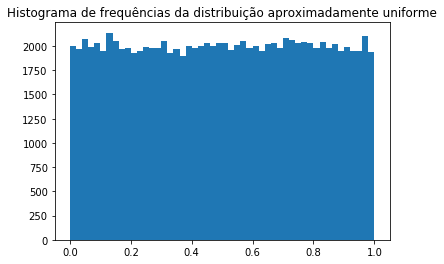

In [4]:
va = np.random.random(99999) # Por padrão, a função random() gera uma distribuição uniforme
plt.hist(va, 50) # va (V.A.) é uma lista de valores no intervalo [0,1)
plt.title('Histograma de frequências da distribuição aproximadamente uniforme')
plt.show()

## Gerando uma distribuição Exponencial
Só para refrescar a memória, a distribuição exponencial é a seguinte ([fonte](https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_exponencial)):
$$f(x;\lambda) = 
\begin{cases}
\lambda e^{-\lambda x} &\text{, }  x\geq 0\\
0 &\text{, }  x<0 
\end{cases}
= \begin{cases}
\dfrac{1}{\lambda}e^{\dfrac{-x}{\lambda}} &, x \geq 0, \lambda > 0\\
0 & , x < 0
\end{cases}$$

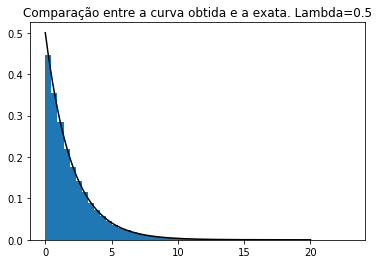

In [4]:
lamb = 0.5 # Lambda, o parâmetro da distribuição exponencial
va_exp = -1/lamb*np.log(va) # Inversa da função distribuição cumulativa F_x(X), X é uma v.a.
plt.hist(va_exp, 50, density=True) # density=True faz com que o gráfico seja normalizado

x = np.linspace(0, 20, len(va_exp))
y1 = lamb*np.exp(-x*lamb) # função distribuição de probabilidade exponencial, ou f_x(X)
plt.plot(x,y1,'k')
plt.title('Comparação entre a curva obtida e a exata. Lambda='+str(lamb))
plt.show()


## Gerando uma distribuição Normal

Média aleatória: 500.03
Desvio padrão aleatório: 9.15


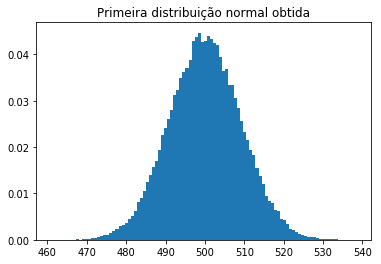

In [5]:
qtdVA = 99999  # Quantidade de valores em cada variável aleatória
va = np.zeros(qtdVA)  # Valores de UMA variável aleatória
va_gauss = np.zeros(qtdVA)  # va com distribuição Gaussiana, ou, Somatório das variáveis aleatórias

for i in range(1000):  # Gerando 1000 variáveis aleatórias
    va = np.random.random(qtdVA) # Gera valores aleatórios no intervalo [0, 1)
    va_gauss = va_gauss + va # Faz o somatório as va's geradas

media_gauss = va_gauss.mean() # Média da va_gauss
desvio_gauss = va_gauss.std() # Desvio padrão da va_gaussiana
print("Média aleatória: " + '{:03.2f}'.format(media_gauss))
print("Desvio padrão aleatório: " + '{:03.2f}'.format(desvio_gauss))
plt.hist(va_gauss, 100, density=True)
plt.title('Primeira distribuição normal obtida')
plt.show()

## Gerando a distribuição Normal Padrão
A distribuição normal com média nula e desvio padrão unitário é chamada de distribuição normal centrada e reduzida ou de distribuição <strong>normal padrão</strong>.

Média normalizada: 0.00 *
Desvio padrão normalizado: 1.00


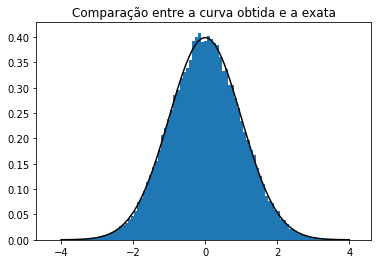

In [8]:
Z = (va_gauss - media_gauss)/desvio_gauss

media_Z = Z.mean()
desvio_Z = Z.std()
print("Média normalizada: " + '{:03.2f}'.format(abs(media_Z))+' *')
print("Desvio padrão normalizado: " + '{:03.2f}'.format(desvio_Z))
plt.hist(Z,100, density=True)

def gauss_dist(x, m, d):
    return 1/(d*np.sqrt(2*pi))*e**(-0.5*((x-m)/d)**2)

x = np.linspace(-4, 4, 100)
y = gauss_dist(x, 0, 1) # Gera a Normal Padrão exata
plt.plot(x , y, 'k') # Esse plot será impresso sobreposto aos último plot
plt.title('Comparação entre a curva obtida e a exata')
plt.show()

#Para dimensionar a dist. com média 'm' e desvio 'd':
#m = 2
#d = 3
#Y = Z*d + m

    * Em alguns casos a média pode ser exibida como -0.00. Isso ocorre porque o valor mostrado é o arredondamento de um valor negativo muito pequeno. A função 'format()' que que está sendo usada conserva o sinal do número mesmo quando arredonda-o para 0.
    A fim de evitar o sinal, imprimimos o módulo da média.

## Gerando uma distribuição de Poisson
A distribuição de Poisson tem a seguinte f.d.p.:

$$p(x) = P(X=x) = e^{-\lambda}\dfrac{\lambda^{x}}{x!} \hspace{30px} x \in Z \text{, e }\lambda > 0$$

O algoritmo usado chama-se "Método da Aceitação/Rejeição":
<ol>
    <li>Fazer $n=0$ e $P=1$;</li>
    <li>Gerar um número aleatório $R_{n}$ e substituir $P$ por $P\cdot R_{n}$;</li>
    <li>Se $P < e^{-\lambda}$, aceitar X = n, caso contrário, rejeitar n atual, fazer $n=n+1$ e retornar aos procedimentos no passo 2.</li>
</ol>


In [ ]:
N= 99999 # Definimos N novamente para caso queiramos usar um diferente do primeiro lá em cima
va = np.random.random(N)

